<a href="https://colab.research.google.com/github/DarkKillX/MachineLearningTasks/blob/main/5WeekTasks/EDA_House_pricing_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dery Hidayat
1103228181

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
file_path = '/content/drive/MyDrive/Datasheet/data_house.csv'

In [11]:
# Baca dataset ke dalam DataFrame
house_df = pd.read_csv(file_path)

# Tampilkan lima baris pertama dari DataFrame
house_df.head()

Unnamed: 0          id             date     price  bedrooms  bathrooms  \
0           0  7129300520  20141013T000000  221900.0         3       1.00   
1           1  6414100192  20141209T000000  538000.0         3       2.25   
2           2  5631500400  20150225T000000  180000.0         2       1.00   
3           3  2487200875  20141209T000000  604000.0         4       3.00   
4           4  1954400510  20150218T000000  510000.0         3       2.00   

   sqft_living  sqft_lot  floors  waterfront  ...  grade  sqft_above  \
0         1180      5650     1.0           0  ...      7        1180   
1         2570      7242     2.0           0  ...      7        2170   
2          770     10000     1.0           0  ...      6         770   
3         1960      5000     1.0           0  ...      7        1050   
4         1680      8080     1.0           0  ...      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 22 columns]

In [13]:
house_2 = house_df.dropna()

In [14]:
house_2.describe()

Unnamed: 0            id         price      bedrooms     bathrooms  \
count  21613.00000  2.161300e+04  2.161300e+04  21613.000000  21613.000000   
mean   10806.00000  4.580302e+09  5.400881e+05      3.370842      2.114757   
std     6239.28002  2.876566e+09  3.671272e+05      0.930062      0.770163   
min        0.00000  1.000102e+06  7.500000e+04      0.000000      0.000000   
25%     5403.00000  2.123049e+09  3.219500e+05      3.000000      1.750000   
50%    10806.00000  3.904930e+09  4.500000e+05      3.000000      2.250000   
75%    16209.00000  7.308900e+09  6.450000e+05      4.000000      2.500000   
max    21612.00000  9.900000e+09  7.700000e+06     33.000000      8.000000   

        sqft_living      sqft_lot        floors    waterfront          view  \
count  21613.000000  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean    2079.899736  1.510697e+04      1.494309      0.007542      0.234303   
std      918.440897  4.142051e+04      0.539989      0.086517      0.766318   
min      290.000000  5.200000e+02      1.000000      0.000000      0.000000   
25%     1427.000000  5.040000e+03      1.000000      0.000000      0.000000   
50%     1910.000000  7.618000e+03      1.500000      0.000000      0.000000   
75%     2550.000000  1.068800e+04      2.000000      0.000000      0.000000   
max    13540.000000  1.651359e+06      3.500000      1.000000      4.000000   

       ...         grade    sqft_above  sqft_basement      yr_built  \
count  ...  21613.000000  21613.000000   21613.000000  21613.000000   
mean   ...      7.656873   1788.390691     291.509045   1971.005136   
std    ...      1.175459    828.090978     442.575043     29.373411   
min    ...      1.000000    290.000000       0.000000   1900.000000   
25%    ...      7.000000   1190.000000       0.000000   1951.000000   
50%    ...      7.000000   1560.000000       0.000000   1975.000000   
75%    ...      8.000000   2210.000000     560.000000   1997.000000   
max    ...     13.000000   9410.000000    4820.000000   2015.000000   

       yr_renovated       zipcode           lat          long  sqft_living15  \
count  21613.000000  21613.000000  21613.000000  21613.000000   21613.000000   
mean      84.402258  98077.939805     47.560053   -122.213896    1986.552492   
std      401.679240     53.505026      0.138564      0.140828     685.391304   
min        0.000000  98001.000000     47.155900   -122.519000     399.000000   
25%        0.000000  98033.000000     47.471000   -122.328000    1490.000000   
50%        0.000000  98065.000000     47.571800   -122.230000    1840.000000   
75%        0.000000  98118.000000     47.678000   -122.125000    2360.000000   
max     2015.000000  98199.000000     47.777600   -121.315000    6210.000000   

          sqft_lot15  
count   21613.000000  
mean    12768.455652  
std     27304.179631  
min       651.000000  
25%      5100.000000  
50%      7620.000000  
75%     10083.000000  
max    871200.000000  

[8 rows x 21 columns]

In [15]:
house_2['price'].value_counts()

350000.0     172
450000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
607010.0       1
1362500.0      1
298800.0       1
957500.0       1
402101.0       1
Name: price, Length: 4028, dtype: int64

In [16]:
house_2['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [17]:
house_2['bathrooms'].value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [18]:
check_duplicate = house_2.duplicated()

In [19]:
True in check_duplicate

False

In [27]:
price_by_facility = house_df.groupby(['bedrooms','bathrooms','floors','waterfront'],as_index=False)['price'].mean()
price_by_facility.sort_values('price',ascending=False)[:10]

bedrooms  bathrooms  floors  waterfront      price
424         6       8.00     2.5           0  7700000.0
423         6       7.75     2.0           0  6885000.0
421         6       6.00     2.0           1  5300000.0
359         5       5.25     2.0           1  5110800.0
367         5       6.75     1.0           1  4668000.0
362         5       5.50     2.0           1  4500000.0
350         5       4.50     2.0           1  3876500.0
360         5       5.50     1.0           0  3800000.0
363         5       5.75     2.0           0  3745000.0
415         6       4.75     1.5           1  3650000.0

In [26]:
price_std_by_location = house_df.groupby(['zipcode','lat','long',],as_index=False)['price'].std()

price_std_by_location.sort_values('price',ascending=False)[:10]

zipcode      lat     long         price
14080    98112  47.6263 -122.314  1.060660e+06
6724     98039  47.6209 -122.237  1.038598e+06
12316    98102  47.6295 -122.320  6.363961e+05
5382     98033  47.6821 -122.196  6.081118e+05
18078    98144  47.5744 -122.283  5.303301e+05
14320    98115  47.6754 -122.327  5.020458e+05
14231    98112  47.6408 -122.307  5.020458e+05
15630    98117  47.6999 -122.391  4.384062e+05
16007    98118  47.5554 -122.267  3.931514e+05
15477    98117  47.6902 -122.387  3.747312e+05

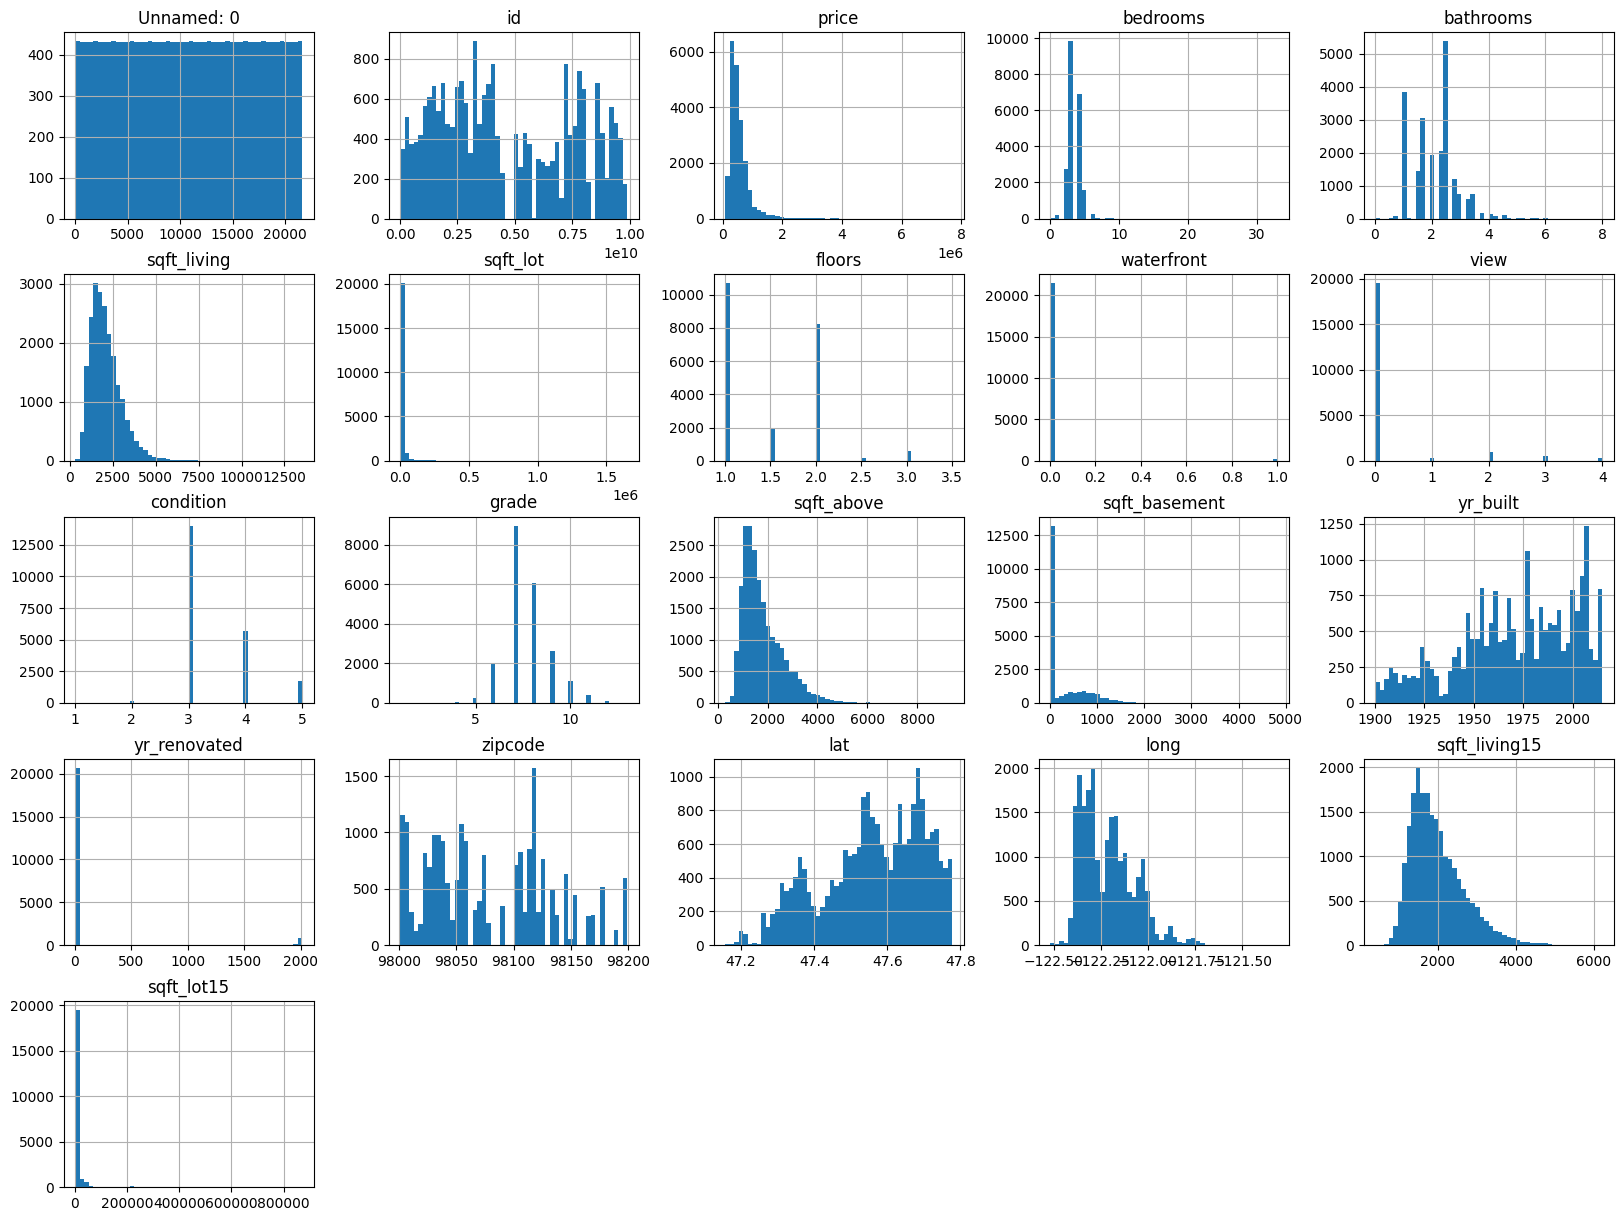

In [28]:
house_df.hist(bins=50, figsize=(20,15))
plt.show()

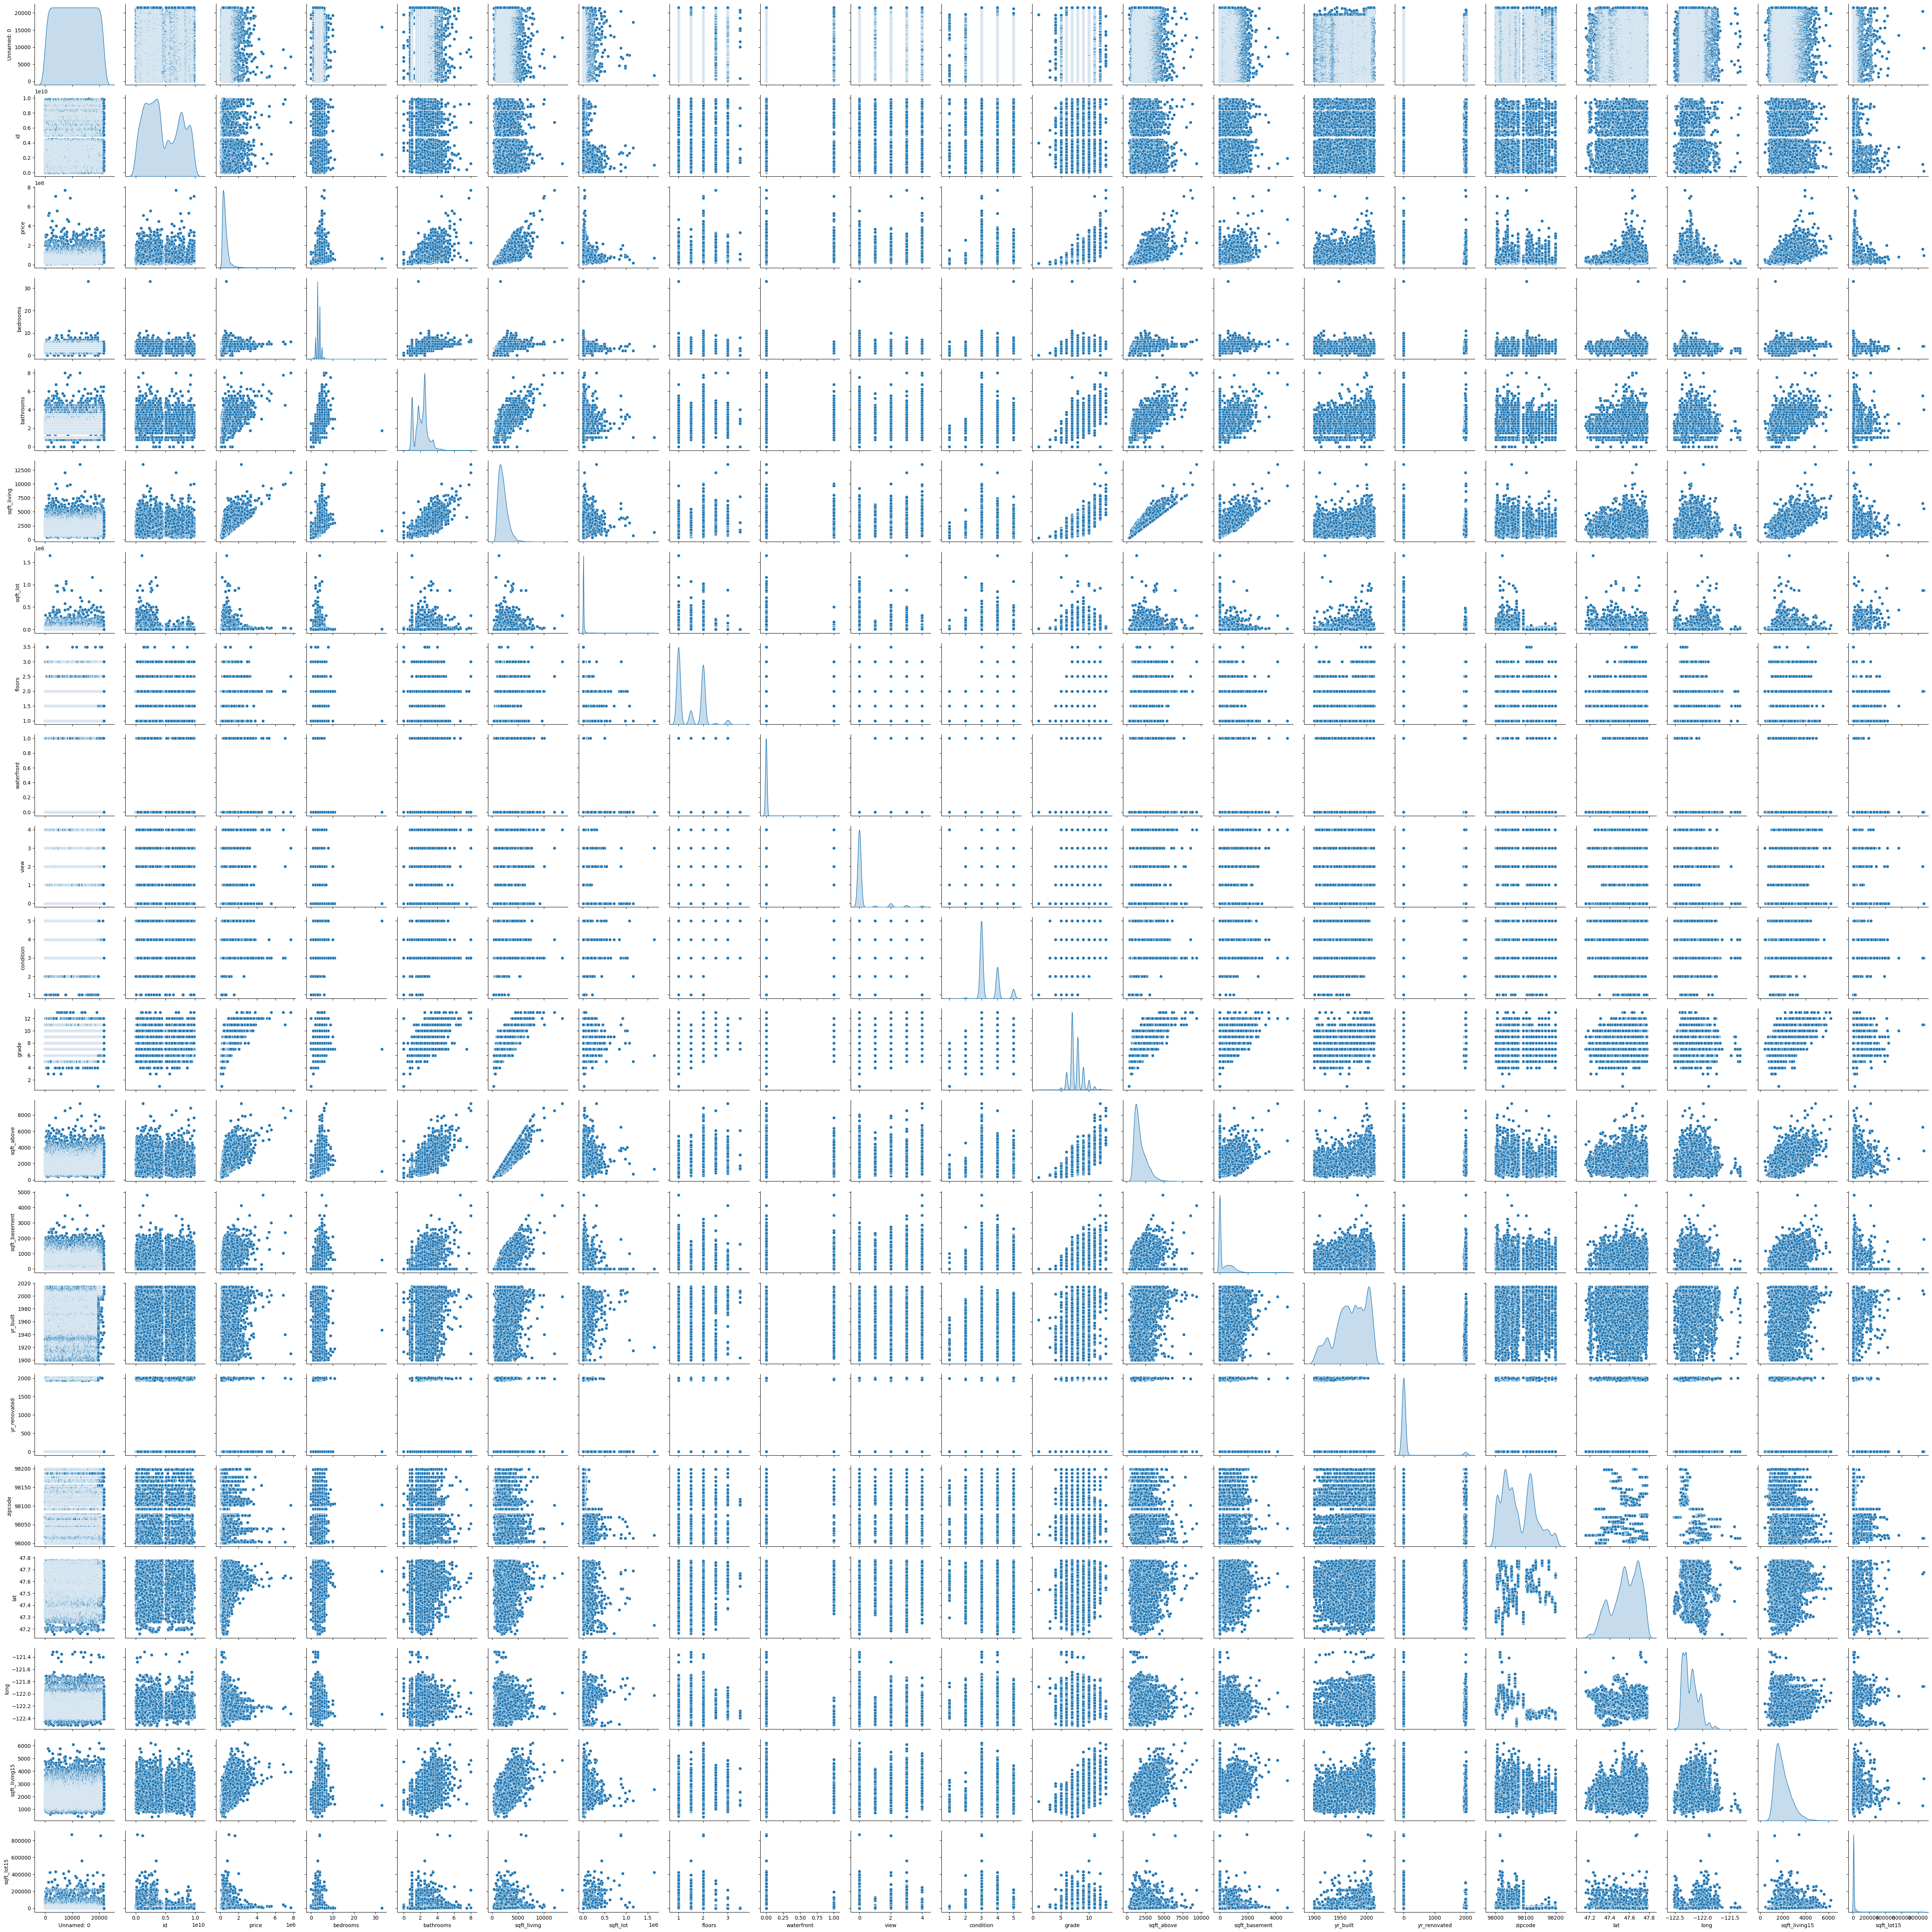

In [29]:
sns.pairplot(house_df, diag_kind = 'kde')

<ipython-input-30-5d88179f37d7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = house_df.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix untuk tiap fitur ')

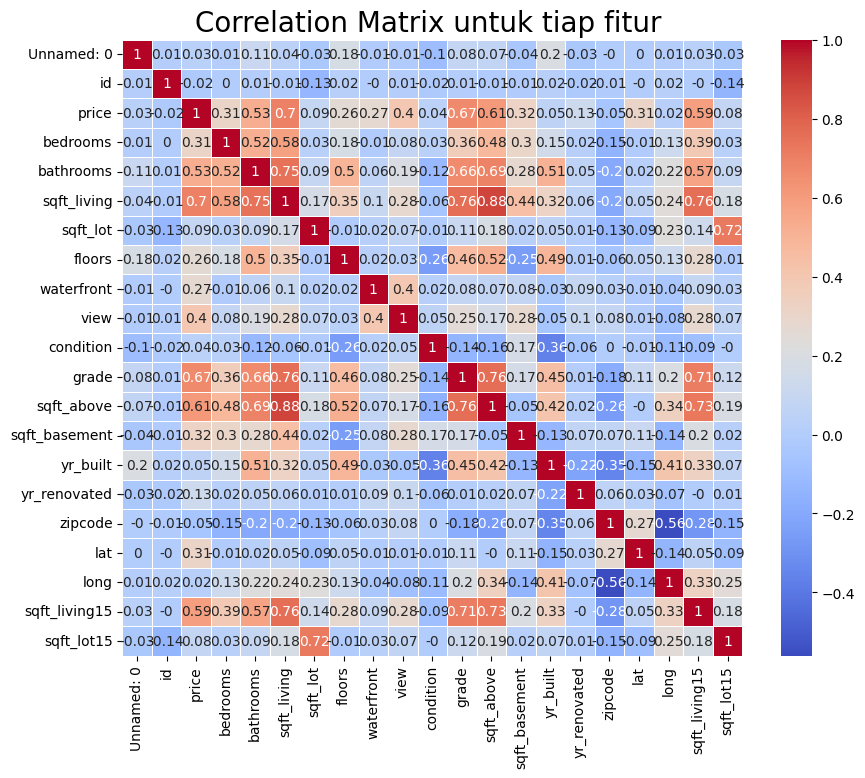

In [30]:
plt.figure(figsize=(10, 8))
correlation_matrix = house_df.corr().round(2)

# Parameter 'annot = True', untuk menampilkan nilai dalam persegi
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk tiap fitur ", size=20)